In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
from scipy.stats import entropy
import math
path = "/content/drive/MyDrive/Colab Notebooks/NNFL_research_paper/"

x_train = pickle.load(open(path +"x_train.pickle","rb"))
y_train = pickle.load(open(path +"y_train.pickle","rb"))

In [ ]:
import tensorflow_addons as tfa
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.models import model_from_json

# loading the saved model
json_file = open(path+'model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(path+"model.h5")
print("Model loaded")


Model loaded


In [72]:
# for all training examples getting predictions(37 probabilities) from the trained model
predictions = loaded_model.predict(x_train)

In [73]:
# function to calculate agreement as mentioned in the research paper
def agreement(image):
  ent = entropy(image)
  return 1 - ent/math.log(37)

In [74]:
# compare function to sort the images based on the agreement
def cmp_items(a, b):
    if a[2] < b[2] :
      return 1
    elif a[2]==b[2]:
      return 0
    else:
      return -1

In [75]:
images = []

import functools

for i in range(128000):
  l1 = []
  l1.append(y_train[i]) # actual values
  l1.append(predictions[i]) # predicted values
  l1.append(agreement(y_train[i]))
  images.append(l1)

# images are sorted wrt agreement
images.sort(key = functools.cmp_to_key(cmp_items))

In [76]:
# 128000 examples divided into 10 bins containing 12800 examples
# these examples are already sorted
bins = []

for i in range(10):
  bin_temp = []
  
  for j in range(i*12800, (i+1)*12800):
    bin_temp.append(images[j])

  bin_temp = np.array(bin_temp)
  bins.append(bin_temp)

print(len(bins))
print(bins[0].shape)

10
(12800, 3)


In [77]:
# calculating average confidence level per bin
# this list of confidence levels is sorted in decreasing order
average_confidence_per_bin = []

for i in range(10):
  sum = 0
  
  for j in range(i*12800, (i+1)*12800):
    sum = sum + images[j][2]
    
  average_confidence_per_bin.append(sum/12800)

print(average_confidence_per_bin)

[0.5099949412114538, 0.4269771875048527, 0.3818036114755913, 0.34566610980195184, 0.31597849927502214, 0.29123248771006627, 0.2710858554678417, 0.252142427543301, 0.233955559299623, 0.20747186165575013]


In [78]:
# calculating rmse of all 37 features per bin
rmse_per_bin = []

for i in range(10):
  feature_error = [] 
  for j in range(37):
    error = 0
    for k in range(12800):
      error = error + (bins[i][k][0][j]-bins[i][k][1][j])**2
    
    feature_error.append(error)
  
  rmse_per_bin.append(feature_error)

In [79]:
feature1_error = [] # question number 6 (index = 5) 
feature2_error = [] # question number 8 (index = 7)
for i in range(10):
  feature1_error.append(1/rmse_per_bin[i][5])
  feature2_error.append(1/rmse_per_bin[i][7])

# 1/rmse vs confidence of two features is plotted below
# we have calculated rmse as root mean squared error is also reliable measure of accuracy 
# below two plots show that 1/rmse inceases with increase in confidence or agreement of a question
# therfore accuracy increase with increase in confidence level

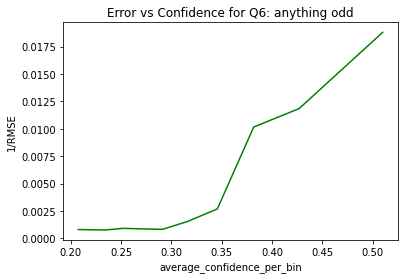

In [82]:
plt.plot(average_confidence_per_bin,feature1_error, 'g')
plt.xlabel('average_confidence_per_bin')
plt.ylabel('1/RMSE')
plt.title('Error vs Confidence for Q6: anything odd')
plt.show()

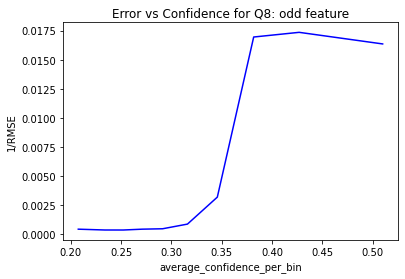

In [83]:
plt.plot(average_confidence_per_bin,feature2_error, 'b')
plt.xlabel('average_confidence_per_bin')
plt.ylabel('1/RMSE')
plt.title('Error vs Confidence for Q8: odd feature')
plt.show()